In [78]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

from copy import deepcopy

In [20]:
def prbs_generator(prbs_bits = 15):
     bin_array = np.array([])
     start = 1;
     lfsr = start;
     i= 1
     
     while True:
         if prbs_bits == 15:
            #   PRBS15 = x^15 + x^14 + 1   Wikipeda
            fb= ((lfsr>>14) ^ (lfsr>>13) & 1)
            lfsr = ((lfsr<<1) + fb) & (2**15-1) 
            bin_array = np.append(bin_array, np.array([bin(lfsr)]))
         if lfsr==start :
             break;
         i = i+1
     
     bin_array_random = deepcopy(bin_array)
     random_permutation = np.random.permutation(len(bin_array))

     def binbits(x, n):
         """Return binary representation of x with at least n bits"""
         bits = x.split('b')[1]

         if len(bits) < n:
             return '0b' + '0' * (n - len(bits)) + bits
         else:
            return x
        
     for idd_bin_array, _ in enumerate(bin_array):
         bin_array_random[idd_bin_array] = deepcopy(binbits(bin_array[random_permutation[idd_bin_array]], prbs_bits)).split('b')[1]
     return bin_array_random

In [24]:
prbs_bits = 15
prbs_sequence = prbs_generator()
len_bit_stream = len(prbs_sequence) * prbs_bits

In [106]:
data_rate = 56e9
nyquist_freq = data_rate / 2
tb = 1 / nyquist_freq

time = np.linspace(0, tb*(len_bit_stream-1), num= len_bit_stream*100)
prbs_data = np.zeros(len(time))
prbs_data_alternative = np.zeros(len(time))

In [107]:
for idd_time, time_slice in enumerate(time):
  time_ui = int(time_slice / tb)
  prbs_data[idd_time] = prbs_sequence[int(time_ui / prbs_bits)][int(time_ui) % prbs_bits]
  prbs_data_alternative[idd_time] = prbs_sequence[1024][int(time_ui) % prbs_bits]

Text(0, 0.5, 'RF Amplitude (a.u.)')

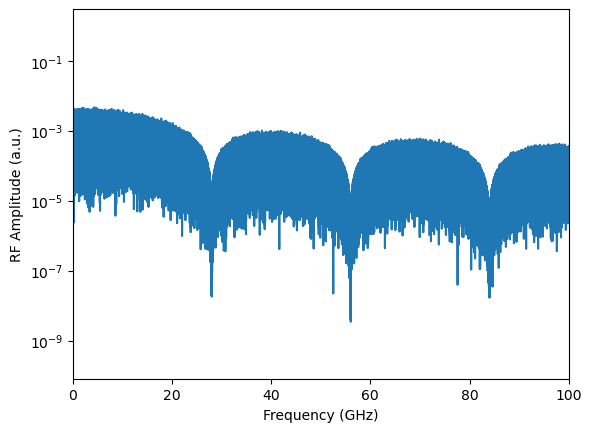

In [108]:
N = len(prbs_data)
dt = np.diff(time)[0] 
freq = fftfreq(N, dt)
prbs_data_fft = fft(prbs_data)

plt.semilogy(freq[:N//2]/1e9,np.abs(prbs_data_fft[:N//2])*2/N, label='FFT - PRBS data')
plt.xlim([0,100])
plt.xlabel('Frequency (GHz)')
plt.ylabel('RF Amplitude (a.u.)')

Text(0, 0.5, 'RF Amplitude (a.u.)')

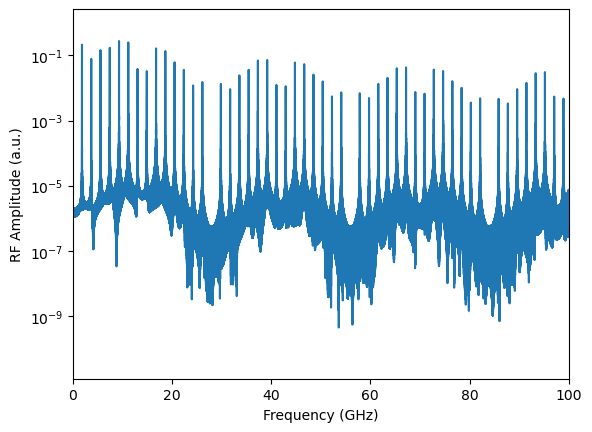

In [109]:
N = len(prbs_data)
dt = np.diff(time)[0] 
freq = fftfreq(N, dt)
prbs_data_alternative_fft = fft(prbs_data_alternative)

plt.semilogy(freq[:N//2]/1e9,np.abs(prbs_data_alternative_fft[:N//2])*2/N, label='FFT - PRBS data')
plt.xlim([0,100])
plt.xlabel('Frequency (GHz)')
plt.ylabel('RF Amplitude (a.u.)')